In [1]:
import os
import pandas as pd
import numpy as np

# Milestone P2

I left milestone P2 task as it is to enable one to compare it with P4 realization. You mentioned that I should use more markdown instead of plain comments. I tried to do this in milestone P4. Would you mind to tell me wheter I managed to do better this time?

## Collecting and understanding data structure

In [2]:
#os library automatically chooses '/' or '\' 
#to represent path to a file
#depending on operational system
data_folder = 'data'
Diabetes_data=os.path.join(data_folder,'diabetes_estimates_osward_2016.csv')
Groceries_data=os.path.join(data_folder,'year_osward_grocery.csv')

#collecting data
#error_bad_lines sets system to neglect lines with too many fields
Diabetes=pd.read_csv(Diabetes_data, error_bad_lines=False)
Groceries=pd.read_csv(Groceries_data, error_bad_lines=False)

In [3]:
#Let's take a look at the data we have
Diabetes.head()

,area_id,gp_patients,gp_patients_diabetes,estimated_diabetes_prevalence
0,E05000026,13136,1068,8.1
1,E05000027,8954,631,7.0
2,E05000028,12032,958,8.0
3,E05000029,8853,700,7.9
4,E05000030,8813,640,7.3


In [4]:
Groceries.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,...,37315,14370.0,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905
1,E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,...,14474,10845.0,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706
2,E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,...,32138,13856.0,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271
3,E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,...,16223,10850.0,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362


## Extracting useful groceries data

We are looking for correlations with diabetes prevalence for the following groups:  
the energy of nutrients and energetical entropy of nutrients. 
  
In article corresponding columns are claimed:   
energy_{nutrients}, h_nutrients_calories.

In [5]:
#First condition chooses all the energy_...
#We don't need any statistics like percentiles energy_fat_perc2.5
#Therefore, the second condition excludes statistics that contain
#two symbols '_' instead of one for the values needed
energy_nutrient_columns=Groceries.columns[Groceries.columns.str.startswith('energy_') &
                                            (Groceries.columns.str.count('_')==1)]

#Let's take a look at what we have got
print('Energy_nutrients columns: \n',energy_nutrient_columns.to_list())

Energy_nutrients columns: 
 ['energy_fat', 'energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'energy_alcohol', 'energy_tot', 'energy_density']


In [6]:
#tot represents total energy
#energy density does not refer to nutrient, hence is not needed
energy_nutrient_columns=energy_nutrient_columns.drop('energy_density')

#We also need area_id to match food data with diabetes prevalence
#Entropy is also parameter included in the study
Columns_Nutrient=energy_nutrient_columns.append(pd.Index(['area_id','h_nutrients_calories']))

## Building dataframe

In [7]:
#At this point we can create our nutrients parameters dataframe
df_Nutrient=Groceries[Columns_Nutrient]
df_Nutrient.head()

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,area_id,h_nutrients_calories
0,85.399176,33.243489,43.864852,19.910240,77.527804,2.890336,1.387201,187.114757,E05000026,1.532485
1,87.602703,32.093215,42.057709,20.846778,75.801393,2.917849,1.469422,188.638145,E05000027,1.541202
2,82.946787,32.522242,42.761088,20.769647,78.648192,2.919193,1.577973,186.861792,E05000028,1.549774
3,87.301229,35.651376,51.754425,18.872734,80.338935,2.868373,1.402662,190.783934,E05000029,1.514848
4,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,188.136201,E05000030,1.540547


In [8]:
#Now we can give more concise names to the columns
df_Nutrient.columns=df_Nutrient.columns.str.replace('energy_','')
df_Nutrient=df_Nutrient.rename(columns={"tot": "energy","h_nutrients_calories":"entropy"})

#And replace 'energy' to the front as it is on the figure
Columns_Nutrient=df_Nutrient.columns.to_list()
Columns_Nutrient.insert(0, Columns_Nutrient.pop(Columns_Nutrient.index('energy')))
df_Nutrient=df_Nutrient.loc[:,Columns_Nutrient]
df_Nutrient.head()

,energy,fat,saturate,sugar,protein,carb,fibre,alcohol,area_id,entropy
0,187.114757,85.399176,33.243489,43.864852,19.910240,77.527804,2.890336,1.387201,E05000026,1.532485
1,188.638145,87.602703,32.093215,42.057709,20.846778,75.801393,2.917849,1.469422,E05000027,1.541202
2,186.861792,82.946787,32.522242,42.761088,20.769647,78.648192,2.919193,1.577973,E05000028,1.549774
3,190.783934,87.301229,35.651376,51.754425,18.872734,80.338935,2.868373,1.402662,E05000029,1.514848
4,188.136201,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,E05000030,1.540547


## Adding diabetes prevalence

We need only two columns from the Diabetes dataframe:  
'area_id' is needed to refer typical product parameters to diabetes prevalence by geographic area  
'estimated_diabetes_prevalence' contain diabetes information we need

In [9]:
#area_id and prevalence data
Diabetes_prevalence_for_area=Diabetes[['area_id','estimated_diabetes_prevalence']]

#Merging Diabetes and Nutrients dataframe on 'area_id'
#It is important to do merge to get intersection, having all the necessary parameters
df_Nutrient=df_Nutrient.merge(Diabetes_prevalence_for_area,on='area_id')

In [10]:
#Now we can drop 'area_id' and remain with dataframe containing only the data needed for the figure
df_Nutrient=df_Nutrient.drop('area_id',axis=1)
df_Nutrient.head()

,energy,fat,saturate,sugar,protein,carb,fibre,alcohol,entropy,estimated_diabetes_prevalence
0,187.114757,85.399176,33.243489,43.864852,19.910240,77.527804,2.890336,1.387201,1.532485,8.1
1,188.638145,87.602703,32.093215,42.057709,20.846778,75.801393,2.917849,1.469422,1.541202,7.0
2,186.861792,82.946787,32.522242,42.761088,20.769647,78.648192,2.919193,1.577973,1.549774,8.0
3,190.783934,87.301229,35.651376,51.754425,18.872734,80.338935,2.868373,1.402662,1.514848,7.9
4,188.136201,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,1.540547,7.3


## Statistical analysis

In [11]:
from scipy import stats

#We represent the correlation results in separate dataframe
df_Spearman_results=pd.DataFrame(columns=df_Nutrient.columns)

#stats.spearmanr calculates a matrix of correlations and p-values for every column
Correlation_matrix,p_value_matrix=stats.spearmanr(df_Nutrient)

In [12]:
#We are looking for correlation of diabetes prevalence with all the other data
#Diabetes prevalence corresponds to the last column, hence Index=-1
df_Spearman_results.loc['Сorrelation']=Correlation_matrix[-1]
df_Spearman_results.loc['p_value']=p_value_matrix[-1]

#Obviously we don't need correlation of prevalence with itself
df_Spearman_results=df_Spearman_results.drop('estimated_diabetes_prevalence',axis=1)

#All statistically insignificant correlations also have to be excluded
Significant_correlation_columns=np.where(df_Spearman_results.loc['p_value']<0.05)[0]
df_Spearman_results=df_Spearman_results.iloc[:,Significant_correlation_columns]

In [13]:
#Result correlations dataframe
df_Spearman_results

,energy,fat,saturate,sugar,protein,carb,fibre,alcohol,entropy
Сorrelation,5.841405e-01,3.646669e-01,3.559264e-01,5.340640e-01,-4.676267e-01,6.847577e-01,-4.951358e-01,-5.634446e-01,-7.747505e-01
p_value,2.356365e-51,1.200295e-18,8.833646e-18,1.162068e-41,4.544949e-31,6.444415e-77,3.564107e-35,3.794913e-47,1.363513e-110


## Data visualization

In [14]:
import matplotlib.pyplot as plt

Food_estimators=df_Spearman_results.columns
Correlations=df_Spearman_results.loc['Сorrelation']

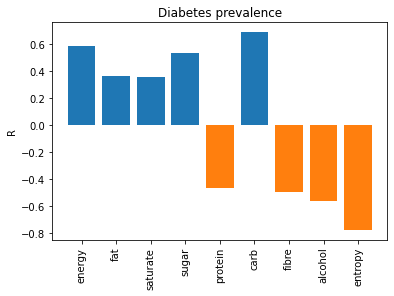

In [15]:
#Represent positive correlations with blue (C0) and negative with orange (C1)
#We use default matplotlib colors C0 and C1 as they are the most convenient
#regardless of color blindness
colors=np.full(len(Correlations),'C0')
colors[Correlations<0]='C1'

plt.bar(Food_estimators,Correlations,color=colors)
plt.xticks(rotation=90)


# R for spearman correlation
plt.ylabel('R')
plt.title('Diabetes prevalence')
plt.show()

## P.S. Discussion

The figure in the article is slightly different. They do not represent the correlation with alcohol. Probably, because alcohol is not the everyday nutrient that we get energy from. Perhaps,
because people can make wrong conclusions leading towards an unhealthy lifestyle.

If I am right, I agree with their decision. Especially, given the fact, that, unfortunately, a friend of mine is an example of how diabetes and alcohol can support each other rather than oppose.

## P.P.S. Similar figure

In [18]:
#Anyway here is the figure similar to the one in the article

df_Spearman_results=df_Spearman_results.drop('alcohol',axis=1)
Food_estimators=df_Spearman_results.columns
Correlations=df_Spearman_results.loc['Сorrelation']

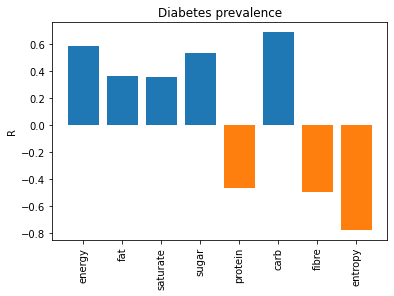

In [19]:
colors=np.full(len(Correlations),'C0')
colors[Correlations<0]='C1'

plt.bar(Food_estimators,Correlations,color=colors)
plt.xticks(rotation=90)


# R for spearman correlation
plt.ylabel('R')
plt.title('Diabetes prevalence')
plt.show()

# Milestone P4

So here our goal is to build an analog of cumulative distribution function on property "representativeness_norm"

Here are the files with the data we need

In [3]:
!ls ./data

diabetes_estimates_osward_2016.csv  year_msoa_grocery.csv
readme.txt			    year_osward_grocery.csv
year_lsoa_grocery.csv


Read representativeness from the files

In [4]:
def read_representativeness(filename):
    return pd.read_csv(filename, error_bad_lines=False)['representativeness_norm']

Read the data to list splitted by aggregation

In [5]:
Levels=['lsoa','msoa','osward']
Filenames=[os.path.join(data_folder,'year_'+level+'_grocery.csv') for level in Levels]
Aggregation_repres=[read_representativeness(filename) for filename in Filenames]

In [6]:
def get_CDF(repres):
    
    #CDF - number of value in sorted value divided by the total number of values
    Treshold=repres.sort_values(ascending=False)
    N=len(repres)
    Percentage= np.array(range(N))/float(N)
    
    res=pd.DataFrame()
    res['Treshold']=Treshold
    res['Percentage']=Percentage
    return res

In [7]:
Aggregation_CDF=[get_CDF(aggr) for aggr in Aggregation_repres]

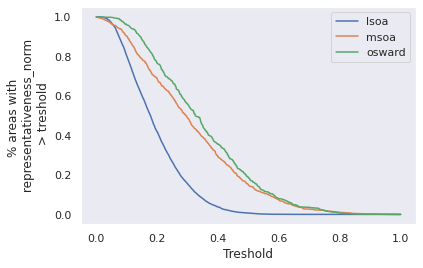

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")
for CDF in Aggregation_CDF:
    sns.lineplot(x="Treshold", y="Percentage", data=CDF)
plt.legend(Levels)
plt.ylabel("% areas with \n representativeness_norm \n > treshold")
plt.show()

Somehow the diagrams for Lsoa and Msoa are different from the presented in the article